In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as inpur_data
import time

In [3]:
mnist = inpur_data.read_data_sets('MNIST_data/', one_hot=True)

W0624 14:07:43.788799  6720 deprecation.py:323] From <ipython-input-3-556e3ae212a3>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0624 14:07:43.796793  6720 deprecation.py:323] From D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0624 14:07:43.797791  6720 deprecation.py:323] From D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0624 14:07:44.175559  6720 deprecation.py:323] From D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0624 14:07:44.178558  6720 deprecation.py:323] From D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0624 14:07:44.250514  6720 deprecation.py:323] From D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
def layer(output_dim, input_dim, inputs, activation=None):
    w = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    xwb = tf.matmul(inputs, w) + b
    if activation is None:
        outputs = xwb
    else:
        outputs = activation(xwb)
    return outputs

In [5]:
x = tf.placeholder('float', [None, 784])

In [6]:
h1 = layer(output_dim=1000, input_dim=784, inputs=x, activation=tf.nn.relu)

In [7]:
h2 = layer(output_dim=1000, input_dim=1000, inputs=h1, activation=tf.nn.relu)

In [8]:
y_predict = layer(output_dim=10, input_dim=1000, inputs=h1, activation=None)

In [9]:
y_label = tf.placeholder('float', [None, 10])

In [10]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))

W0624 14:07:48.514761  6720 deprecation.py:323] From <ipython-input-10-30de2dec7946>:1: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [11]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

In [12]:
correct_prediction = tf.equal(tf.arg_max(y_label, 1), tf.arg_max(y_predict, 1))

W0624 14:07:49.008455  6720 deprecation.py:323] From <ipython-input-12-c03b869da5b0>:1: arg_max (from tensorflow.python.ops.gen_math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.math.argmax` instead


In [13]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

In [14]:
train_epochs = 15
batch_size = 100
total_batchs = int(mnist.train.num_examples / batch_size)
loss_list = []
epoch_list = []
accuracy_list = []

start_time = time.time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [15]:
for epoch in range(train_epochs):
    for i in range(total_batchs):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={x: batch_x, y_label: batch_y})
    loss, acc = sess.run([loss_function, accuracy], feed_dict={x: mnist.validation.images, y_label: mnist.validation.labels})
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print('Train Epoch:', '%02d' % (epoch + 1), 'Loss=', '{:.9f}'.format(loss), 'Accuracy=', acc)
duration = time.time() - start_time
print('Train Finished takes:', duration)

Train Epoch: 01 Loss= 8.596482277 Accuracy= 0.8864
Train Epoch: 02 Loss= 5.546602249 Accuracy= 0.915
Train Epoch: 03 Loss= 4.754313469 Accuracy= 0.9242
Train Epoch: 04 Loss= 3.940591812 Accuracy= 0.9332
Train Epoch: 05 Loss= 3.595865726 Accuracy= 0.9368
Train Epoch: 06 Loss= 3.264836550 Accuracy= 0.9422
Train Epoch: 07 Loss= 2.901438236 Accuracy= 0.9482
Train Epoch: 08 Loss= 2.875448465 Accuracy= 0.9464
Train Epoch: 09 Loss= 2.897874117 Accuracy= 0.9486
Train Epoch: 10 Loss= 2.631164551 Accuracy= 0.9528
Train Epoch: 11 Loss= 2.682693243 Accuracy= 0.9502
Train Epoch: 12 Loss= 2.529482365 Accuracy= 0.9544
Train Epoch: 13 Loss= 2.597662926 Accuracy= 0.9568
Train Epoch: 14 Loss= 2.413704395 Accuracy= 0.9568
Train Epoch: 15 Loss= 2.449710608 Accuracy= 0.9572
Train Finished takes: 110.82513523101807


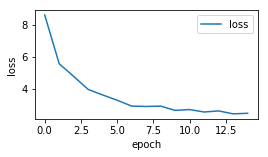

In [16]:
fig = plt.gcf()
fig.set_size_inches(4, 2)
plt.plot(epoch_list, loss_list, label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')

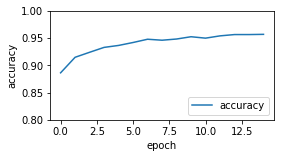

In [17]:
plt.plot(epoch_list, accuracy_list, label='accuracy')
fig = plt.gcf()
fig.set_size_inches(4, 2)
plt.ylim(0.8, 1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='lower right')

In [18]:
print('Accuracy:', sess.run(accuracy, feed_dict={x: mnist.test.images, y_label: mnist.test.labels}))

Accuracy: 0.9546


In [19]:
prediction_result = sess.run(tf.arg_max(y_predict, 1), feed_dict={x: mnist.test.images})

In [20]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [21]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(np.reshape(images[idx], (28, 28)), cmap='binary')
        title = 'label=' + str(np.argmax(labels[idx]))
        if len(prediction) > 0:
            title += ', predict=' + str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

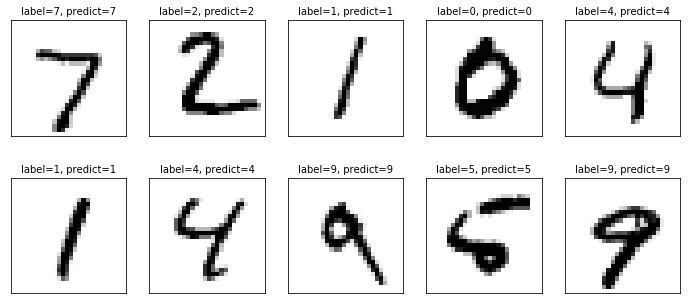

In [22]:
plot_images_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result, 0)